In [1]:
import pandas as pd
import numpy as np
flights = pd.read_csv('flightsbyWWpart2.csv')
flights = pd.DataFrame(flights)df.pivot(index='date', columns='variable', values='value')

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
flights.head()

,Unnamed: 0,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,WW,DAY_COUNT
0,0,4,AS,98,N407AS,ANC,SEA,-22.0,NaN,NaN,NaN,NaN,NaN,1,1
1,1,4,AA,2336,N3KUAA,LAX,PBI,-9.0,NaN,NaN,NaN,NaN,NaN,1,1
2,2,4,US,840,N171US,SFO,CLT,5.0,NaN,NaN,NaN,NaN,NaN,1,1
3,3,4,AA,258,N3HYAA,LAX,MIA,-9.0,NaN,NaN,NaN,NaN,NaN,1,1
4,4,4,AS,135,N527AS,SEA,ANC,-21.0,NaN,NaN,NaN,NaN,NaN,1,1


In [68]:
alist = flights['ORIGIN_AIRPORT'].unique()

In [88]:
flights['ORIGIN_AIRPORT'].describe()

count     5714008
unique        934
top           ATL
freq       343506
Name: ORIGIN_AIRPORT, dtype: object

In [79]:
airportlist = flights['ORIGIN_AIRPORT'].value_counts()
airportlist = pd.DataFrame(airportlist)

In [83]:
airportlist.reset_index(inplace=True)
airportlist.index = airportlist.index + 1

In [85]:
airportlist['total'] = 0.0

In [90]:
tot = 0
for i,row in airportlist.iterrows():
    count = row['ORIGIN_AIRPORT']
    count = float(count)
    percent = (count/5714008)*100
    tot = tot + percent
    airportlist.set_value(i,'total',tot)

In [99]:
top20 = airportlist.loc[1:20,'index'].tolist()

In [100]:
top20

['ATL',
 'ORD',
 'DFW',
 'DEN',
 'LAX',
 'PHX',
 'SFO',
 'IAH',
 'LAS',
 'MSP',
 'SEA',
 'MCO',
 'DTW',
 'BOS',
 'CLT',
 'EWR',
 'SLC',
 'LGA',
 'JFK',
 'BWI']

<IPython.core.display.Javascript object>


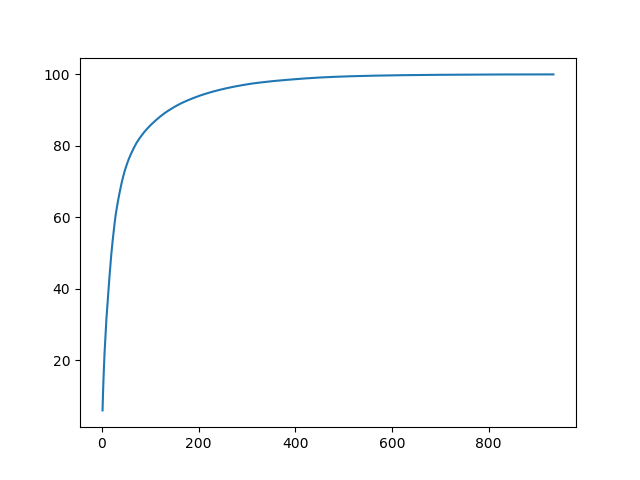

In [95]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(airportlist.index, airportlist['total'])
#plot X axis is number of airport and Y axis is % of total flights

In [132]:
flights2 = flights.copy()

In [134]:
flights2.shape

(5714008, 15)

In [165]:
flights3 = flights2[['AIRLINE', 'ORIGIN_AIRPORT', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'ARRIVAL_DELAY' , 'DAY_COUNT']].copy()

In [166]:
flights4 = flights3.copy()

In [167]:
flights4.head()

,AIRLINE,ORIGIN_AIRPORT,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ARRIVAL_DELAY,DAY_COUNT
0,AS,ANC,NaN,NaN,NaN,NaN,NaN,-22.0,1
1,AA,LAX,NaN,NaN,NaN,NaN,NaN,-9.0,1
2,US,SFO,NaN,NaN,NaN,NaN,NaN,5.0,1
3,AA,LAX,NaN,NaN,NaN,NaN,NaN,-9.0,1
4,AS,SEA,NaN,NaN,NaN,NaN,NaN,-21.0,1


In [151]:
import time
tim = time.time()

In [172]:
print list_of_airlines
print top20
print delay_reason

['AS' 'AA' 'US' 'DL' 'NK' 'UA' 'HA' 'B6' 'OO' 'EV' 'F9' 'WN' 'MQ' 'VX']
['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'PHX', 'SFO', 'IAH', 'LAS', 'MSP', 'SEA', 'MCO', 'DTW', 'BOS', 'CLT', 'EWR', 'SLC', 'LGA', 'JFK', 'BWI']
['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'ARRIVAL_DELAY']


In [182]:
top20delay = []
def delay_by_reason_city_airline_day(day):
    flights4 = flights3.copy()
    flights4 = flights4[flights4['DAY_COUNT'] == day]
    for air in list_of_airlines:
        flights4 = flights4[flights4['AIRLINE'] == air]
        for city in top20:
            flights4 = flights4[flights4['ORIGIN_AIRPORT'] == city]
            for reason in delay_reason:
                count1 = len(flights4[flights4[reason] > 10])
                count1 = float(count1)
                total1 = len(flights4['ARRIVAL_DELAY'])
                total1 = float(total1)
                if total1 > 0:
                    percent1 = (count1/total1)*100
                    top20delay.append(percent1)
                else:
                    top20delay.append(-1)
            flights4 = flights3.copy()
            flights4 = flights4[flights4['DAY_COUNT'] == day]
            flights4 = flights4[flights4['AIRLINE'] == air]
        flights4 = flights3.copy()
        flights4 = flights4[flights4['DAY_COUNT'] == day]


In [184]:
import time
tim = time.time()
daily_trends = np.arange(1,366)

for val in daily_trends:
    delay_by_reason_city_airline_day(val)
print "the time to run this code is", (time.time() - tim)/60 , "minutes"
print top20delay
print len(top20delay)

KeyboardInterrupt: 

In [198]:
top20delay2 = top20delay[0:613200]

In [199]:
len(top20delay2)

613200

In [200]:
top20del = pd.DataFrame(top20delay2)

In [204]:
top20del.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [215]:
top20del['Delay_Reason'] = ""
top20del['ORIGIN_AIRPORT'] = ""
top20del['AIRLINE'] = ""
top20del['DAY_COUNT'] = 0
top20del.head()

,0,DAY_COUNT,Delay_Reason,ORIGIN_AIRPORT,AIRLINE
0,0.0,0,,,
1,0.0,0,,,
2,0.0,0,,,
3,0.0,0,,,
4,0.0,0,,,


In [219]:
top20del.rename(columns={0: 'Values'}, inplace=True)
top20del.index = top20del.index + 1

In [220]:
top20del.head()

,Values,DAY_COUNT,Delay_Reason,ORIGIN_AIRPORT,AIRLINE
1,0.0,0,,,
2,0.0,0,,,
3,0.0,0,,,
4,0.0,0,,,
5,0.0,0,,,


In [221]:
print list_of_airlines
print top20
print delay_reason

['AS' 'AA' 'US' 'DL' 'NK' 'UA' 'HA' 'B6' 'OO' 'EV' 'F9' 'WN' 'MQ' 'VX']
['ATL', 'ORD', 'DFW', 'DEN', 'LAX', 'PHX', 'SFO', 'IAH', 'LAS', 'MSP', 'SEA', 'MCO', 'DTW', 'BOS', 'CLT', 'EWR', 'SLC', 'LGA', 'JFK', 'BWI']
['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'ARRIVAL_DELAY']


In [324]:
var = 0
var1 = 0
var2 = 0
day = 1
import time
tim = time.time()
for i,row in top20del.iterrows():
    #top20del.set_value(i,'DAY_COUNT',day)
    #top20del.set_value(i,'Delay_Reason',delay_reason[var])
    top20del.set_value(i,'ORIGIN_AIRPORT',top20[var1])
    #top20del.set_value(i,'AIRLINE',list_of_airlines[var2])
    #var = var + 1
    #var1 = var1 + 1
    #var2 = var2 + 1
    #if var > 5:
    #    var = 0
    #else: continue
    #if var1 > 19:
    #    var1 = 0
    #else: continue
    #if var2 > 13:
    #    var2 = 0
    #else: continue
    if i % 6 == 0:
        var1 = var1 + 1
        if var1 > 19:
            var1 = 0
        else: continue
    #    day = day + 1
    #else: continue

print "time to run the code is", (time.time() - tim)/60 , "minutes"


time to run the code is 0.99007311662 minutes


In [325]:
top20del.head(130)

,Values,DAY_COUNT,Delay_Reason,ORIGIN_AIRPORT,AIRLINE
1,0.000000,1,AIR_SYSTEM_DELAY,ATL,AS
2,0.000000,1,SECURITY_DELAY,ATL,AS
3,0.000000,1,AIRLINE_DELAY,ATL,AS
4,0.000000,1,LATE_AIRCRAFT_DELAY,ATL,AS
5,0.000000,1,WEATHER_DELAY,ATL,AS
6,0.000000,1,ARRIVAL_DELAY,ATL,AS
7,0.000000,1,AIR_SYSTEM_DELAY,ORD,AS
8,0.000000,1,SECURITY_DELAY,ORD,AS
9,0.000000,1,AIRLINE_DELAY,ORD,AS
10,0.000000,1,LATE_AIRCRAFT_DELAY,ORD,AS


In [328]:
top20del1 = top20del.pivot_table(index='DAY_COUNT', columns=['ORIGIN_AIRPORT','AIRLINE','Delay_Reason'], values='Values')

In [354]:
top20del1.to_csv('top20del.csv')

In [378]:
top4 = ['DL','AA','UA','WN']
middle4 = ['AS','B6','VX','NK', 'F9']

<IPython.core.display.Javascript object>


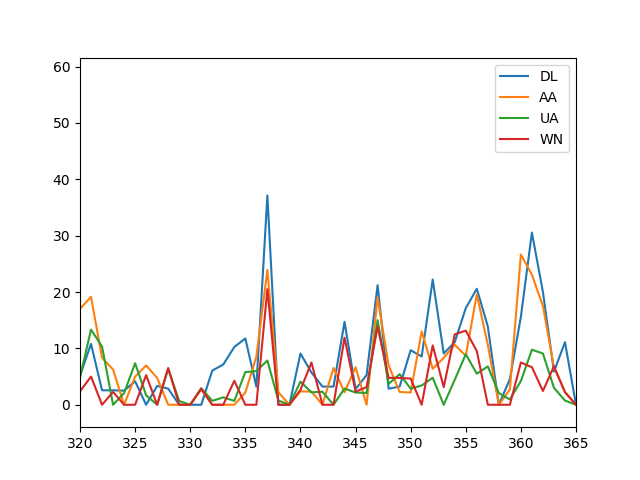

In [411]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()
for air in top4:
    plt.plot(top20del1['SFO',air,'AIR_SYSTEM_DELAY'])
plt.xlim(320,365)
plt.legend(top4)

In [330]:
top20del1['ATL', 'DL'].head()


Delay_Reason,AIRLINE_DELAY,AIR_SYSTEM_DELAY,ARRIVAL_DELAY,LATE_AIRCRAFT_DELAY,SECURITY_DELAY,WEATHER_DELAY
DAY_COUNT,,,,,,
1,3.393665,0.678733,6.334842,1.131222,0.0,0.000000
2,4.738562,1.633987,18.137255,3.594771,0.0,3.921569
3,11.829945,7.393715,31.977819,8.687616,0.0,4.990758
4,14.026403,8.250825,35.313531,11.551155,0.0,1.155116
5,4.107425,1.421801,9.636651,1.579779,0.0,0.315956


In [168]:
delay_reason = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'ARRIVAL_DELAY']


In [169]:
delay_reason

['AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY',
 'ARRIVAL_DELAY']